<a href="https://colab.research.google.com/github/syamkakarla98/DataScience_Head_Start/blob/master/Sackoverflow_Developer_Survey_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stackoverflow Developer Survey 2019 Analysis
<p align="center">

  <img src="https://149351115.v2.pressablecdn.com/wp-content/uploads/2019/04/survey-blog-banner-1200x469.png">
</p>

* Image Source Credit: **Stackoverflow**

In [1]:
# Ignore
%cd drive/My\ Drive/DataScience/Data_Science_Head_Start/


/content/drive/My Drive/DataScience/Data_Science_Head_Start


In [0]:
# SDS - Stackoverflow Developer Survey
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [0]:
pd.set_option('display.width', 6000)
pd.set_option('display.max_rows', 85)
pd.set_option('display.max_columns', 85)
plt.style.use('seaborn-whitegrid')

In [4]:
ls data/

README_2019.txt     survey_results_public.csv
so_survey_2019.pdf  survey_results_schema.csv


In [0]:
df = pd.read_csv('data/survey_results_public.csv')
schema = pd.read_csv('data/survey_results_schema.csv')

In [6]:
df.shape, schema.shape

((88883, 85), (85, 2))

In [7]:
schema.dtypes

Column          object
QuestionText    object
dtype: object

In [8]:
for id, ques in zip(schema.loc[:, 'Column'].tolist(), schema.loc[:, 'QuestionText'].tolist()):
  print("%24s %10s %20s"%(id, '--------', ques))

              Respondent   -------- Randomized respondent ID number (not in order of survey response time)
              MainBranch   -------- Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code."
                Hobbyist   -------- Do you code as a hobby?
             OpenSourcer   -------- How often do you contribute to open source?
              OpenSource   -------- How do you feel about the quality of open source software (OSS)?
              Employment   -------- Which of the following best describes your current employment status?
                 Country   -------- In which country do you currently reside?
                 Student   -------- Are you currently enrolled in a formal, degree-granting college or university program?
                 EdLevel   -------- Which of the following best describes the highest level of formal education that you’ve completed?
          UndergradMajor   -------- What was your main or mos

In [9]:
df.head()

Respondent                                         MainBranch Hobbyist                 OpenSourcer                                         OpenSource                              Employment                 Country         Student                                            EdLevel                                     UndergradMajor                                           EduOther                   OrgSize                                            DevType YearsCode Age1stCode      YearsCodePro           CareerSat                 JobSat              MgrIdiot  MgrMoney   MgrWant                                            JobSeek          LastHireDate                                            LastInt FizzBuzz                                         JobFactors                                       ResumeUpdate CurrencySymbol          CurrencyDesc  CompTotal CompFreq  ConvertedComp  WorkWeekHrs                                           WorkPlan                                      WorkChallenge                        WorkRemote WorkLoc                  ImpSyn                                  CodeRev  CodeRevHrs                      UnitTests                                        PurchaseHow                   PurchaseWhat                           LanguageWorkedWith                           LanguageDesireNextYear                                DatabaseWorkedWith                             DatabaseDesireNextYear                 PlatformWorkedWith                 PlatformDesireNextYear                           WebFrameWorkedWith        WebFrameDesireNextYear MiscTechWorkedWith                    MiscTechDesireNextYear                                    DevEnviron        OpSys                              Containers BlockchainOrg                                       BlockchainIs BetterLife                                  ITperson OffOn SocialMedia              Extraversion ScreenName        SOVisit1st                      SOVisitFreq                                          SOVisitTo                 SOFindAnswer                     SOTimeSaved  SOHowMuchTime SOAccount                           SOPartFreq                                             SOJobs                                           EntTeams           SOComm                            WelcomeChange                                       SONewContent   Age Gender Trans                Sexuality                                 Ethnicity Dependents           SurveyLength                  SurveyEase
0           1             I am a student who is learning to code      Yes                       Never  The quality of OSS and closed source software ...  Not employed, and not looking for work          United Kingdom              No                          Primary/elementary school                                                NaN  Taught yourself a new language, framework, or ...                       NaN                                                NaN         4         10               NaN                 NaN                    NaN                   NaN       NaN       NaN                                                NaN                   NaN                                                NaN      NaN                                                NaN                                                NaN            NaN                   NaN        NaN      NaN            NaN          NaN                                                NaN                                                NaN                               NaN     NaN                     NaN                                      NaN         NaN                            NaN                                                NaN                            NaN              HTML/CSS;Java;JavaScript;Python  C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL                                            SQLite                                              MySQL                      MacOS;Windows                Android;Arduino

## MainBranch

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
Respondent                88883 non-null int64
MainBranch                88331 non-null object
Hobbyist                  88883 non-null object
OpenSourcer               88883 non-null object
OpenSource                86842 non-null object
Employment                87181 non-null object
Country                   88751 non-null object
Student                   87014 non-null object
EdLevel                   86390 non-null object
UndergradMajor            75614 non-null object
EduOther                  84260 non-null object
OrgSize                   71791 non-null object
DevType                   81335 non-null object
YearsCode                 87938 non-null object
Age1stCode                87634 non-null object
YearsCodePro              74331 non-null object
CareerSat                 72847 non-null object
JobSat                    70988 non-null object
MgrIdiot                  61

In [0]:
mb = df.MainBranch.value_counts(dropna=False, normalize=True).sort_index()

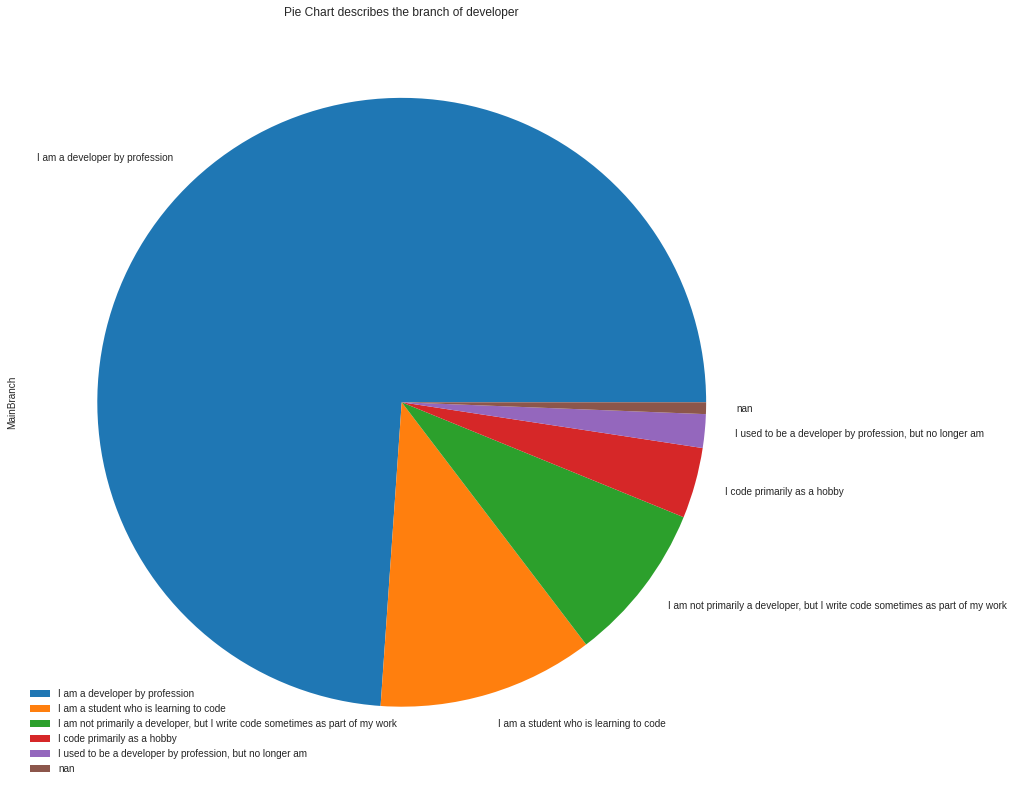

In [12]:
# plt.figure(figsize=(16, 8))
mb.plot(kind = 'pie', legend = True, figsize=(20, 14), title ='Pie Chart describes the branch of developer')
plt.legend(loc='lower left');

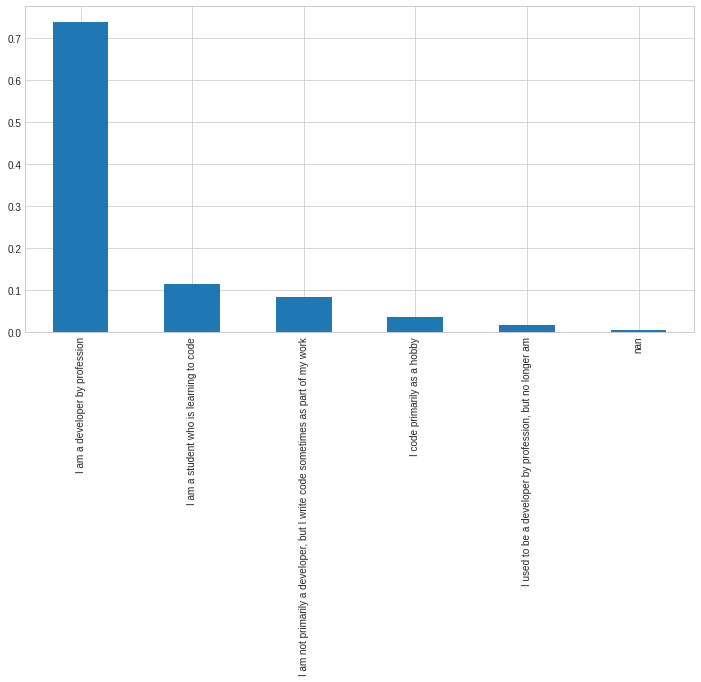

In [13]:
mb.plot(kind = 'bar', figsize=(12, 6));


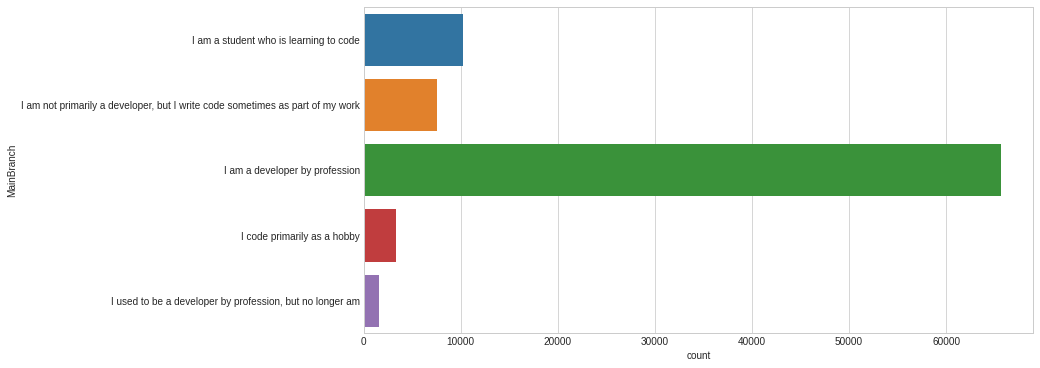

In [14]:
plt.figure(figsize = (12, 6))
sns.countplot(y ='MainBranch', data=df);

Text(0, 0.5, 'Country')

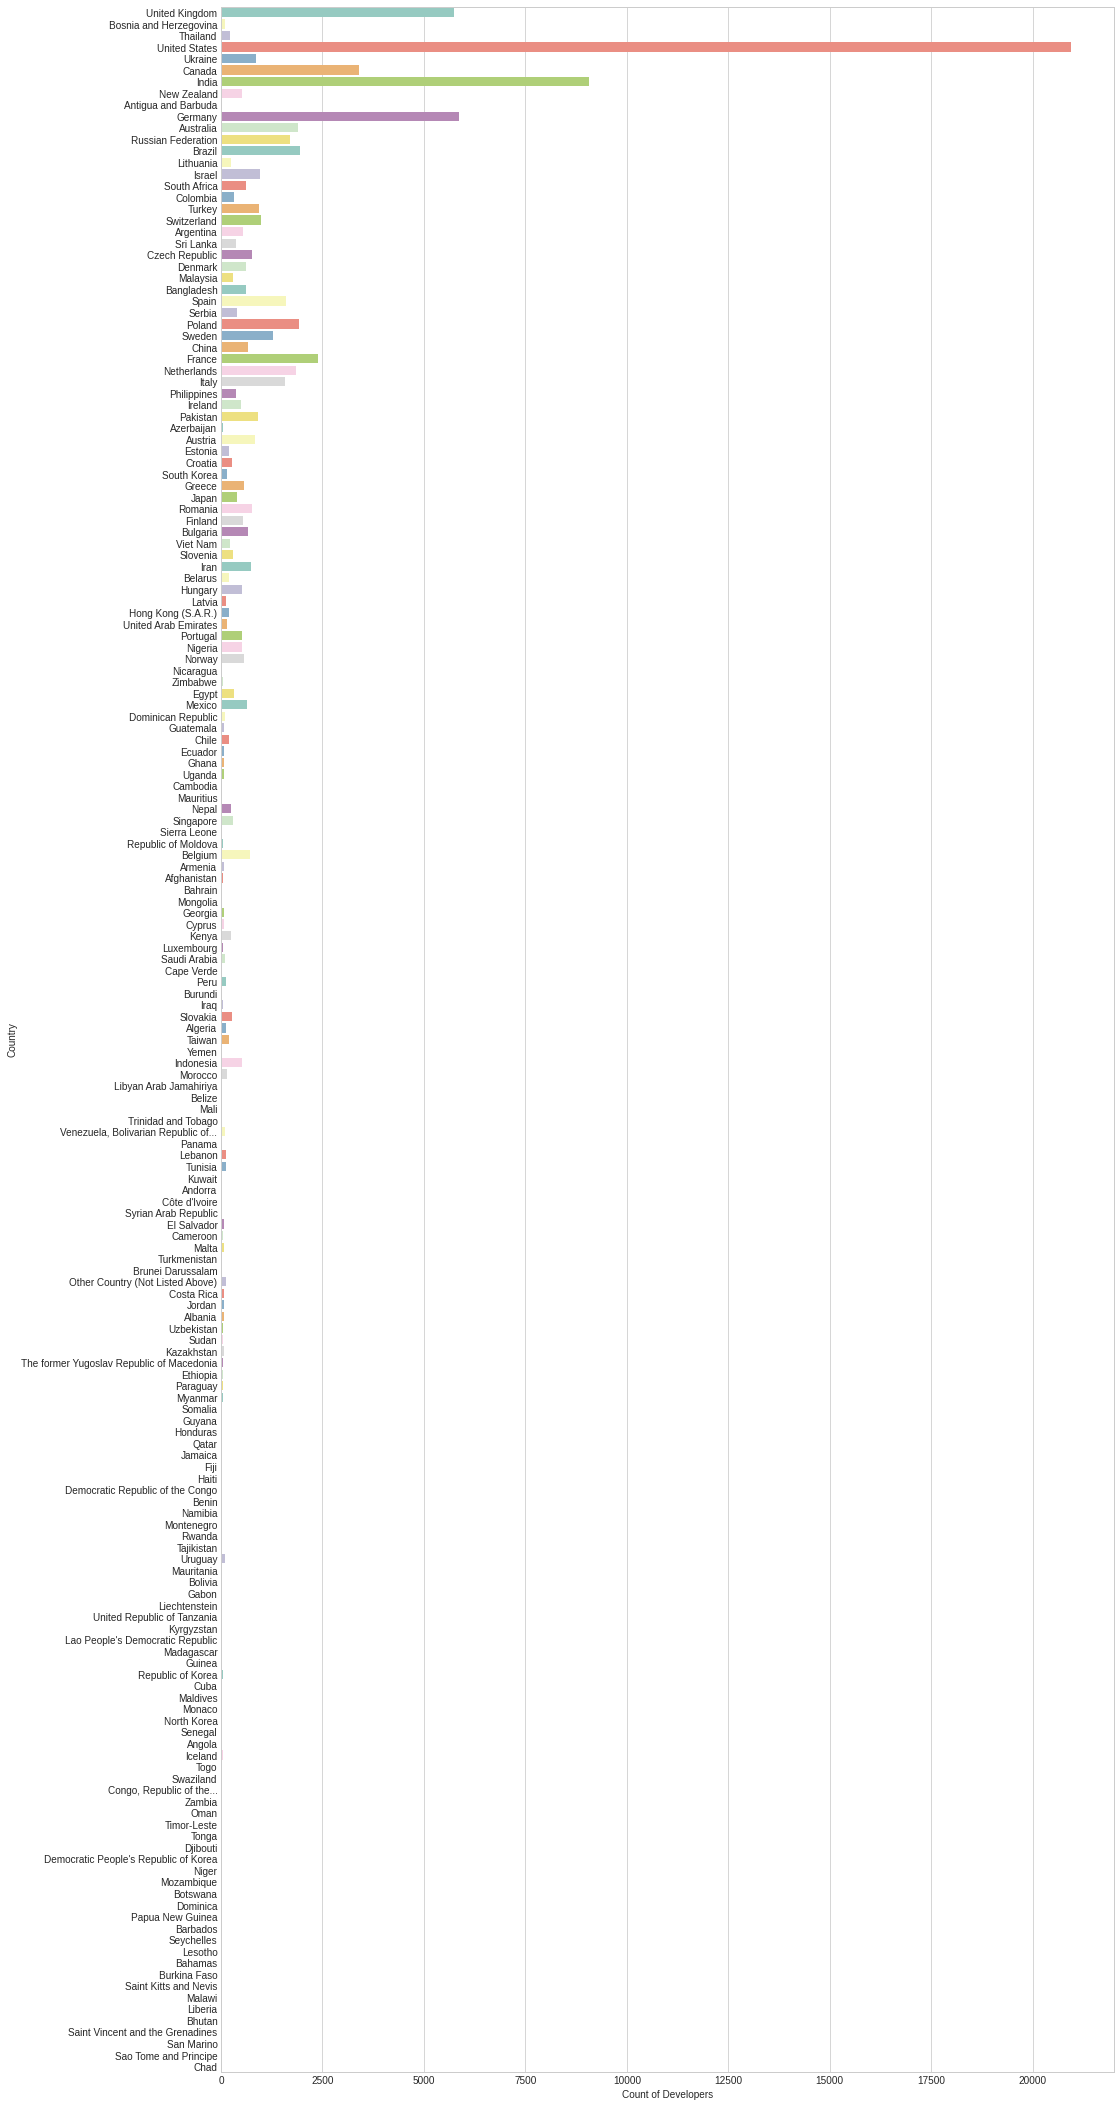

In [15]:
plt.figure(figsize=(16, 38))
sns.countplot(y = 'Country', data = df, palette="Set3");
plt.xlabel('Count of Developers')
plt.ylabel('Country')

The major number of developers are resides in U.S.A then in India. So, let's take a look on the developers in India.

In [0]:
idf = df[df.Country == 'India']

In [17]:
idf.shape

(9061, 85)

In [18]:
df.head()

Respondent                                         MainBranch Hobbyist                 OpenSourcer                                         OpenSource                              Employment                 Country         Student                                            EdLevel                                     UndergradMajor                                           EduOther                   OrgSize                                            DevType YearsCode Age1stCode      YearsCodePro           CareerSat                 JobSat              MgrIdiot  MgrMoney   MgrWant                                            JobSeek          LastHireDate                                            LastInt FizzBuzz                                         JobFactors                                       ResumeUpdate CurrencySymbol          CurrencyDesc  CompTotal CompFreq  ConvertedComp  WorkWeekHrs                                           WorkPlan                                      WorkChallenge                        WorkRemote WorkLoc                  ImpSyn                                  CodeRev  CodeRevHrs                      UnitTests                                        PurchaseHow                   PurchaseWhat                           LanguageWorkedWith                           LanguageDesireNextYear                                DatabaseWorkedWith                             DatabaseDesireNextYear                 PlatformWorkedWith                 PlatformDesireNextYear                           WebFrameWorkedWith        WebFrameDesireNextYear MiscTechWorkedWith                    MiscTechDesireNextYear                                    DevEnviron        OpSys                              Containers BlockchainOrg                                       BlockchainIs BetterLife                                  ITperson OffOn SocialMedia              Extraversion ScreenName        SOVisit1st                      SOVisitFreq                                          SOVisitTo                 SOFindAnswer                     SOTimeSaved  SOHowMuchTime SOAccount                           SOPartFreq                                             SOJobs                                           EntTeams           SOComm                            WelcomeChange                                       SONewContent   Age Gender Trans                Sexuality                                 Ethnicity Dependents           SurveyLength                  SurveyEase
0           1             I am a student who is learning to code      Yes                       Never  The quality of OSS and closed source software ...  Not employed, and not looking for work          United Kingdom              No                          Primary/elementary school                                                NaN  Taught yourself a new language, framework, or ...                       NaN                                                NaN         4         10               NaN                 NaN                    NaN                   NaN       NaN       NaN                                                NaN                   NaN                                                NaN      NaN                                                NaN                                                NaN            NaN                   NaN        NaN      NaN            NaN          NaN                                                NaN                                                NaN                               NaN     NaN                     NaN                                      NaN         NaN                            NaN                                                NaN                            NaN              HTML/CSS;Java;JavaScript;Python  C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL                                            SQLite                                              MySQL                      MacOS;Windows                Android;Arduino

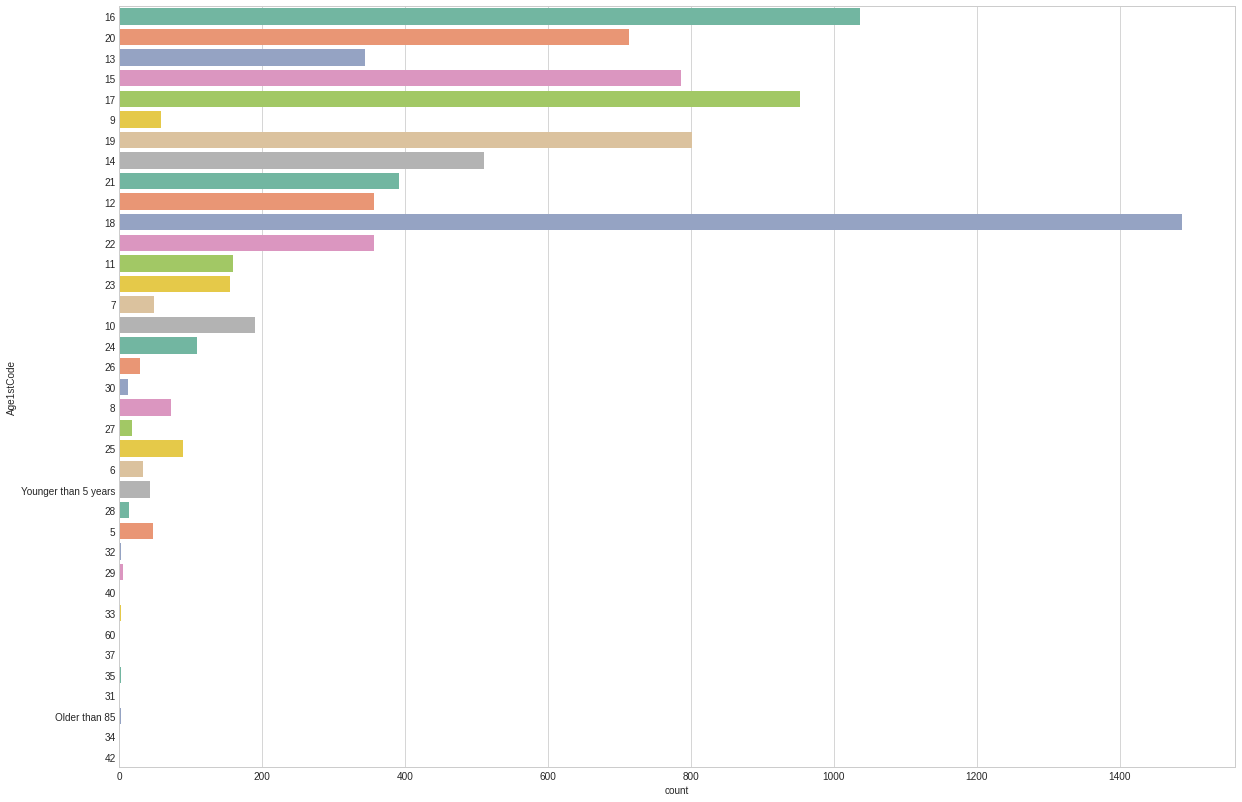

In [19]:
plt.figure(figsize = (20,14))
sns.countplot(y ='Age1stCode', data=idf, palette = 'Set2');

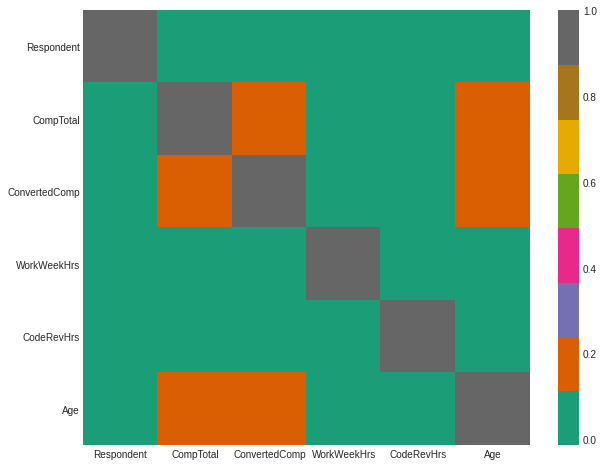

In [20]:
# Correlation between attributes
plt.figure(figsize=(10, 8))
sns.heatmap(idf.corr(), cmap='Dark2');

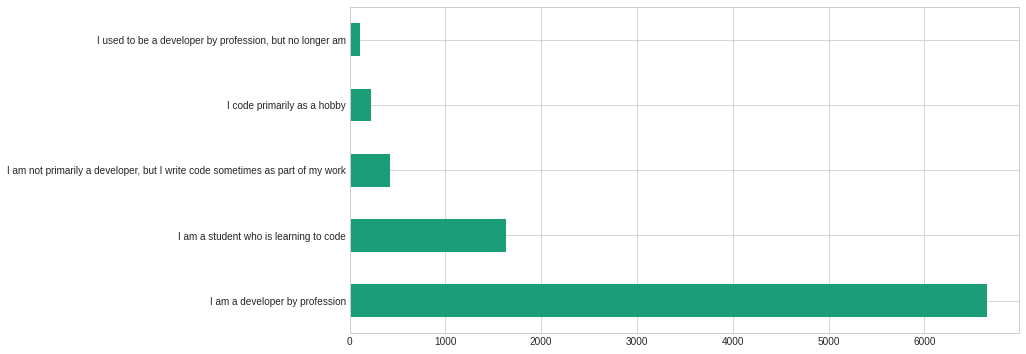

In [21]:
# Let's see the MainBranch of the developers w.r.t india

idf.MainBranch.value_counts().sort_index().plot(kind = 'barh', cmap='Dark2', figsize=(12, 6));

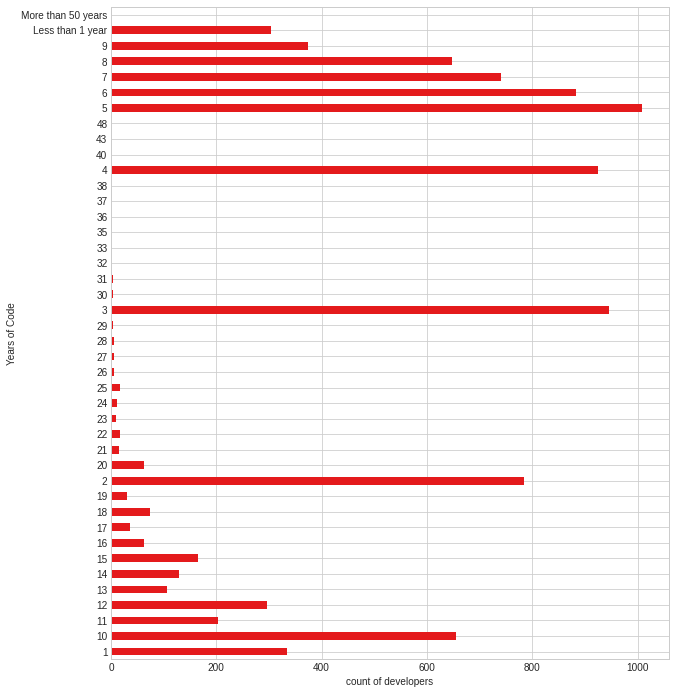

In [22]:
idf.YearsCode.value_counts().sort_index().plot(kind='barh', cmap='Set1', figsize=(10, 12))
plt.ylabel('Years of Code')
plt.xlabel('count of developers');

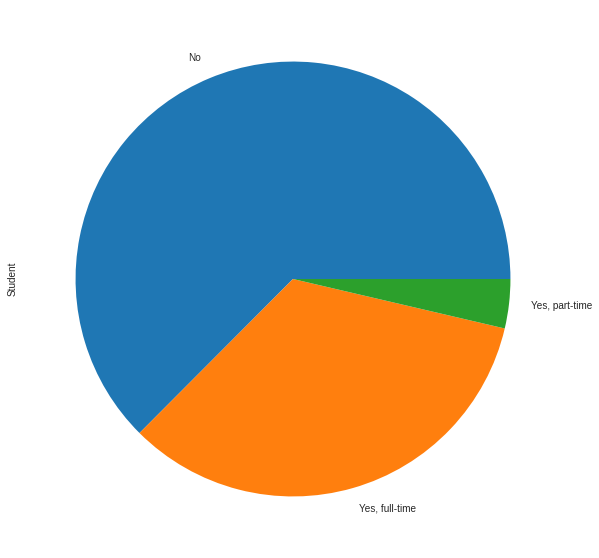

In [23]:
# let's see, how many of them are students
plt.figure(figsize=(12, 10))
idf.Student.value_counts().sort_index().plot(kind = 'pie');

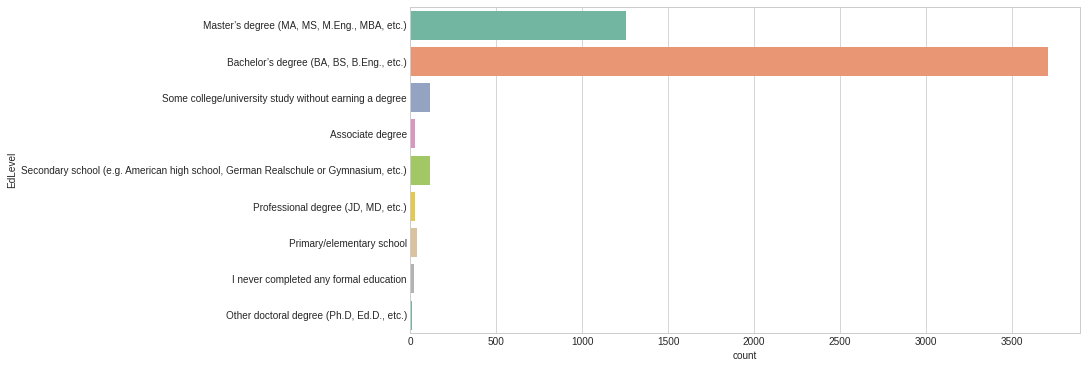

In [24]:
# let's see education profile of the developers who aren't studetns
plt.figure(figsize=(12, 6))
sns.countplot(y = 'EdLevel', data = idf[idf.Student == 'No'], palette='Set2');

## Let's see few questions

#### 1. What are the unique values of education level?

In [66]:
print('\n'.join(map(str, idf.EdLevel.unique().tolist())))

Bachelor’s degree (BA, BS, B.Eng., etc.)
Master’s degree (MA, MS, M.Eng., MBA, etc.)
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)
Some college/university study without earning a degree
nan
Associate degree
Other doctoral degree (Ph.D, Ed.D., etc.)
I never completed any formal education
Professional degree (JD, MD, etc.)
Primary/elementary school


#### 2. what is the percentage of developers with bachelors do code as a hobby in India?

> Note: **EdLevel** means 'Which of the following best describes the highest level of formal education that you’ve completed?'

In [87]:
schema[schema.Column == 'EdLevel'].values.tolist()[0]

['EdLevel',
 'Which of the following best describes the highest level of formal education that you’ve completed?']

In [91]:
idf[idf.EdLevel == 'Bachelor’s degree (BA, BS, B.Eng., etc.)'].Hobbyist.value_counts(normalize=True)

Yes    0.785766
No     0.214234
Name: Hobbyist, dtype: float64

  

> Nearly, **78%** do code as a **hobby**



#### 3. What is the minimum, maximum and average salary of the people with education degree as bachelors and who is not a student?

In [89]:
schema[schema.Column == 'CompTotal'].values.tolist()[0]

['CompTotal',
 'What is your current total compensation (salary, bonuses, and perks, before taxes and deductions), in `CurrencySymbol`? Please enter a whole number in the box below, without any punctuation. If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.']

In [98]:
idf[(idf.EdLevel == 'Bachelor’s degree (BA, BS, B.Eng., etc.)') & (idf.Student == 'No')].CompTotal.value_counts(dropna=False)

NaN          1508
1200000.0      53
800000.0       49
900000.0       48
1500000.0      47
             ... 
625000.0        1
423000.0        1
95000.0         1
64397.0         1
731000.0        1
Name: CompTotal, Length: 531, dtype: int64

In [121]:
idf.loc[:, ['EdLevel', 'CompTotal']].groupby('EdLevel').agg({"CompTotal": ['min', 'max', 'mean']}) 

CompTotal                            
                                                         min          max           mean
EdLevel                                                                                 
Associate degree                                        10.0    4500000.0  432442.150000
Bachelor’s degree (BA, BS, B.Eng., etc.)                 0.0  106673250.0  832125.153108
I never completed any formal education                 100.0    1400000.0  346825.000000
Master’s degree (MA, MS, M.Eng., MBA, etc.)              0.0    7400000.0  795922.550214
Other doctoral degree (Ph.D, Ed.D., etc.)             3000.0    3600000.0  954400.000000
Primary/elementary school                            20000.0     500000.0  162250.000000
Professional degree (JD, MD, etc.)                     250.0    3675000.0  788402.777778
Secondary school (e.g. American high school, Ge...    2000.0    2000000.0  360869.444444
Some college/university study without earning a...    2000.0   15000000.0  618462.000000

In [130]:
idf.loc[:, ['EdLevel', 'CompTotal']].groupby('EdLevel').agg({"CompTotal": ['min', 'max', 'mean']}).loc['Bachelor’s degree (BA, BS, B.Eng., etc.)', :].astype('int64')

CompTotal  min             0
           max     106673250
           mean       832125
Name: Bachelor’s degree (BA, BS, B.Eng., etc.), dtype: int64



---

